<a href="https://colab.research.google.com/github/Bluelord/EE524/blob/assignments/Assignment7/NileshGupta_206102031/EE524_Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE524 Introduction to Machine Learning Lab**




Name: **Nilesh Gupta**, Ph.D. EEE Department. 

Roll No. **206102031**



In [64]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc

**(1)** 2D function $f(x) = x^2 + 3x + 2$ 

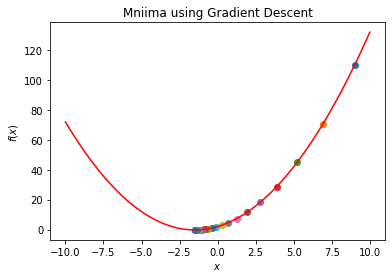

The Minima of the function is:-1.4870016295875035,-0.2498310423666199 


In [65]:
# Function
def f(x):
    return x**2+3*x+2

x = np.linspace(-10.0, 10.0, 100)
y = f(x)

# ploting the function for overlaying the gradiant Descent points
plt.plot(x, y,'r-')

alpha = 0.1 # learning rate
max_iteration = 1000
precision = 0.0001 # stop condition

x0 = 9 # Initial point for finding Minima
y0 = f(x0)
plt.scatter(x0, f(x0))
# start with condition greater than precision (assumption)
condition = precision + 10.0 
iteration = 0 
tmp_y = y0
while condition > precision and iteration < max_iteration: # Stop condition
    x0 = x0 - alpha * misc.derivative(f, x0) # Using the gradiant (Derivative)
    y0 = f(x0)
    iterration = iteration + 1
    condition = abs( tmp_y - y0 )
    tmp_y = y0
   # print (x0,y0,condition)
    plt.scatter(x0, y0)
plt.xlabel("$x$")
plt.ylabel("$f(x)$ ")
plt.title("Mniima using Gradient Descent")
plt.show()
# The Minima of the Function
print("The Minima of the function is:{},{} ".format(x0,y0,condition))
# Approximatly (-1.5, -0.25)

**(2)** 3D function $f(x_1; x_2) = x_1^2 + x_2^2$

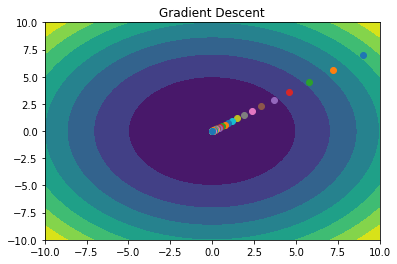

The Minima of the function is:1.0087402946598817e-22,9.145515647539412e-23 


In [66]:
# Function
def f(x1,x2):
    return (x1**2 + x2**2);

def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return misc.derivative(wraps, point[var], dx = 1e-6)

# Plot Function
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)
xx1,xx2 = np.meshgrid(x1,x2);
z = (xx1**2 + xx2**2);
h = plt.contourf(x1,x2,z)
# Gradient Descent
alpha = 0.1 # learning rate
max_iteration = 1000
precision = 0.0001 # stop condition
# start point
x1_0 = 9 
x2_0 = 7 
z0 = f(x1_0,x2_0)
plt.scatter(x1_0,x2_0)

condition = precision + 10.0 # start with cond greater than eps (assumption)
iteration = 0 
tmp_z0 = z0
while condition > precision and iteration < max_iteration:
    tmp_x1_0 = x1_0 - alpha * partial_derivative(f, 0, [x1_0,x2_0])
    tmp_x2_0 = x2_0 - alpha * partial_derivative(f, 1, [x1_0,x2_0])
    x1_0 = tmp_x1_0
    x2_0 = tmp_x2_0
    z0 = f(x1_0,x2_0)
    iteration = iteration + 1
    cond = abs( tmp_z0 - z0 )
    tmp_z0 = z0
    plt.scatter(x1_0, x2_0)
plt.title("Gradient Descent")
plt.show()

# The Minima of the Function
print("The Minima of the function is:{},{} ".format(x1_0,x2_0,condition))
# Approximatly (0,0)

**Boolean Function Learning**

$y = f(x_1; x_2) = x_1.x_2$



In [67]:
# These are XOR inputs
x=np.array([[0,0,1,1],
            [0,1,0,1]])
# These are XOR outputs
y=np.array([[0,0,0,1]])
# Number of inputs, output & hidden layer
n_x = 2
n_y = 1
n_h = 2

m = x.shape[1]
alpha = 0.1                    # Learning rate
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
losses = []

In [68]:
# sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y): 
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

Text(0, 0.5, 'Loss value')

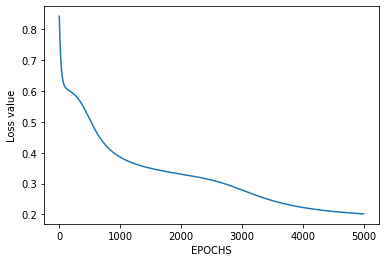

In [69]:
iterations = 5000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-alpha*dw2
    w1 = w1-alpha*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [70]:
# Predicting the test input
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [71]:
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

For input [1, 0] output is 0
For input [0, 0] output is 0
For input [0, 1] output is 0
For input [1, 1] output is 0


$y = f(x_1; x_2) = x_1 \oplus  x_2$

In [72]:
# These are XOR Inputs & Output
x=np.array([[0,0,1,1],[0,1,0,1]])
# These are XOR outputs
y=np.array([[0,1,1,0]])
# Number of inputs, output and hidden layers
n_x = 2
n_y = 1
n_h = 2

m = x.shape[1]

alpha = 0.1                    # Learning rate
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
losses = []

In [73]:
# sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

Text(0, 0.5, 'Loss value')

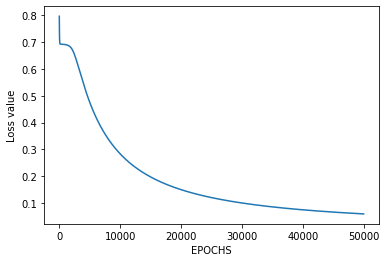

In [74]:
iterations = 50000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-alpha*dw2
    w1 = w1-alpha*dw1
# We plot losses to see how our network
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [75]:
# Predicting the test input.
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [76]:
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0
